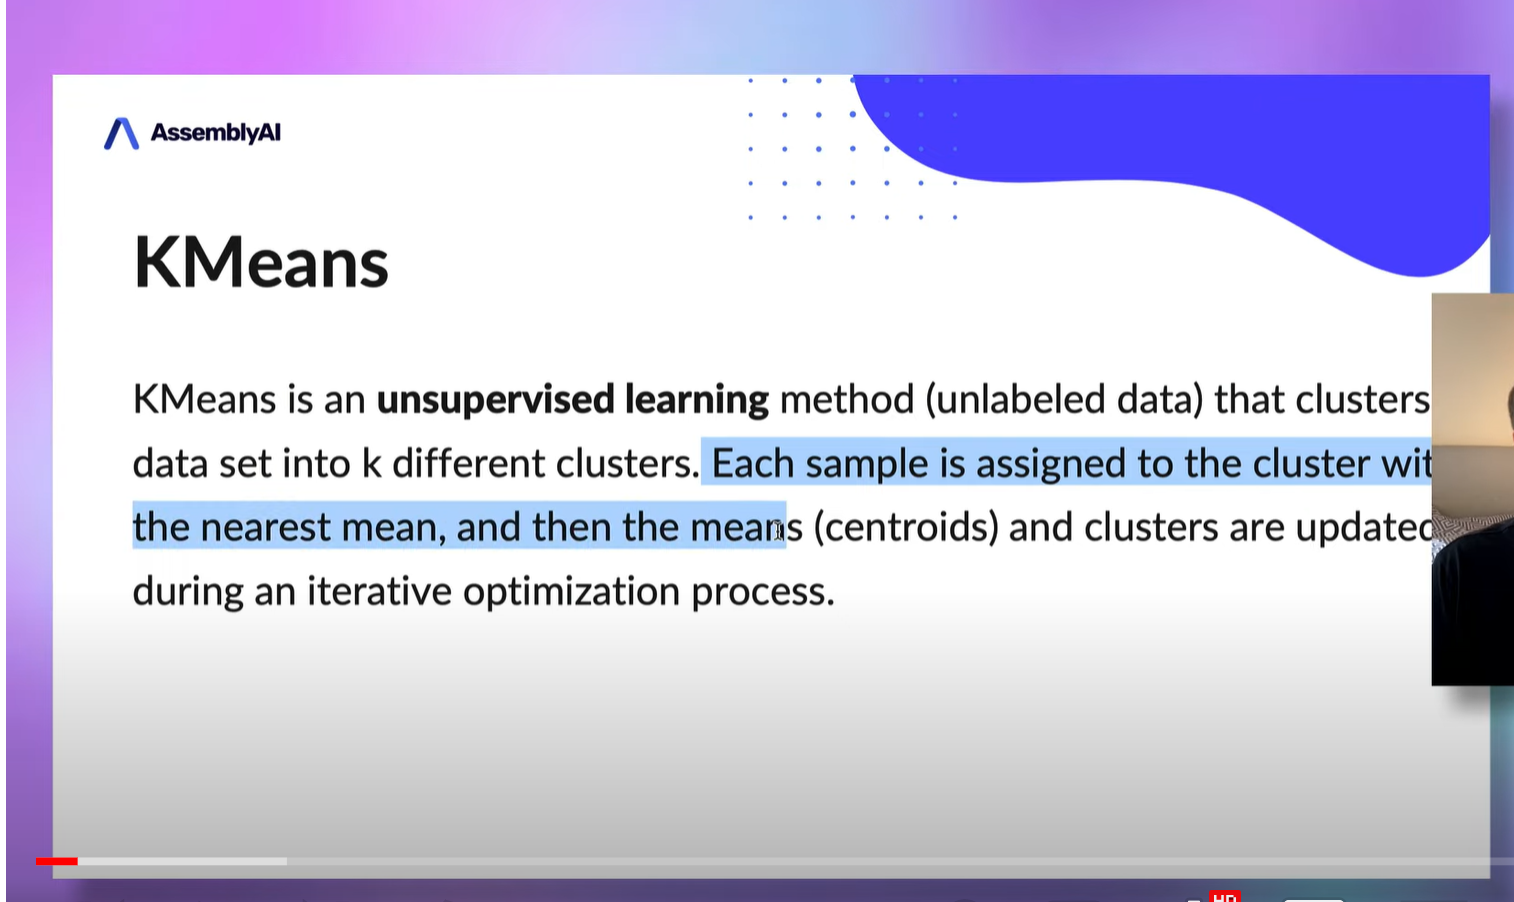

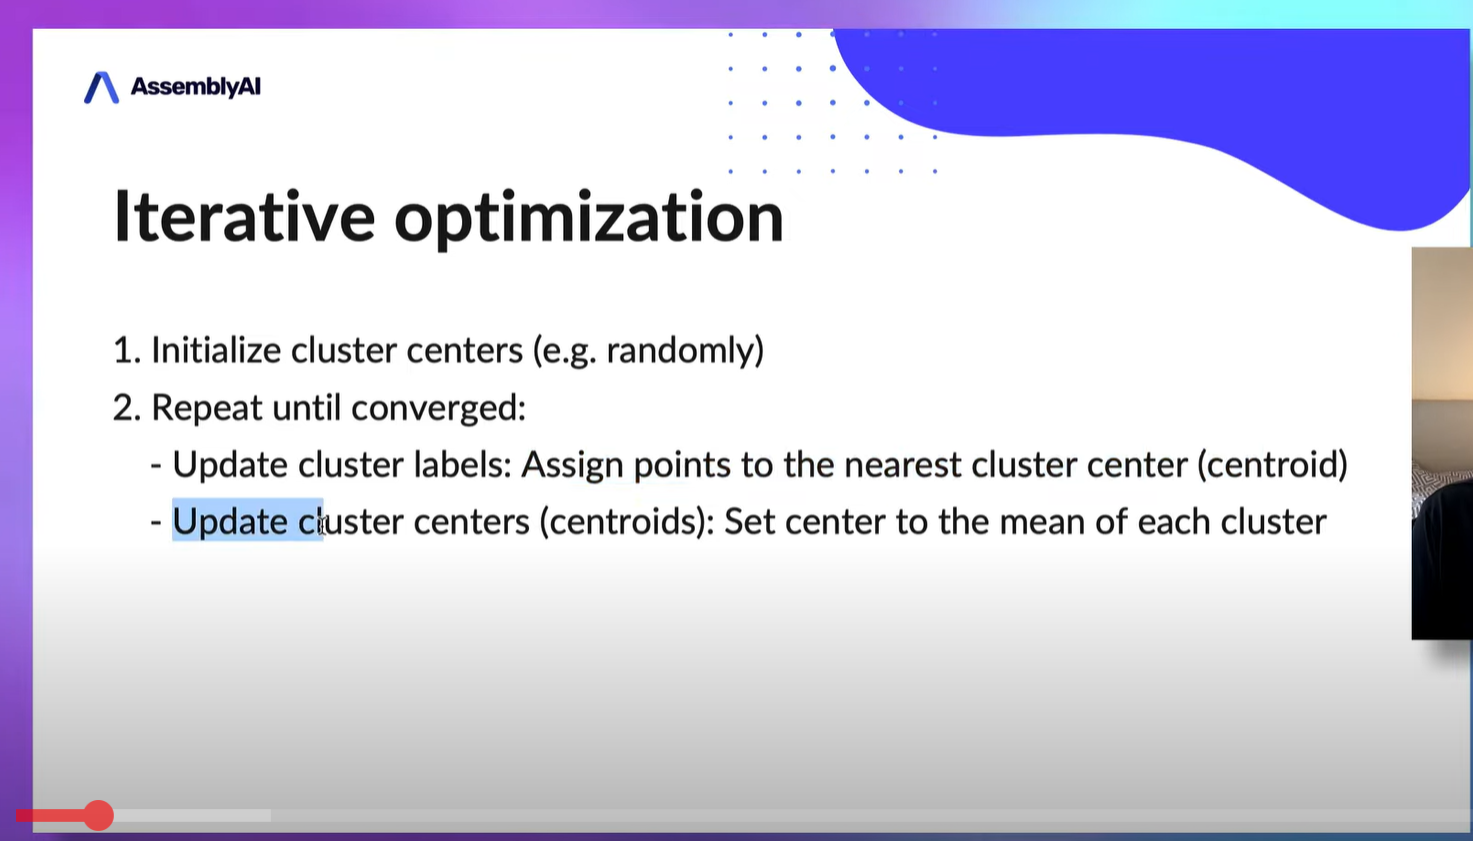

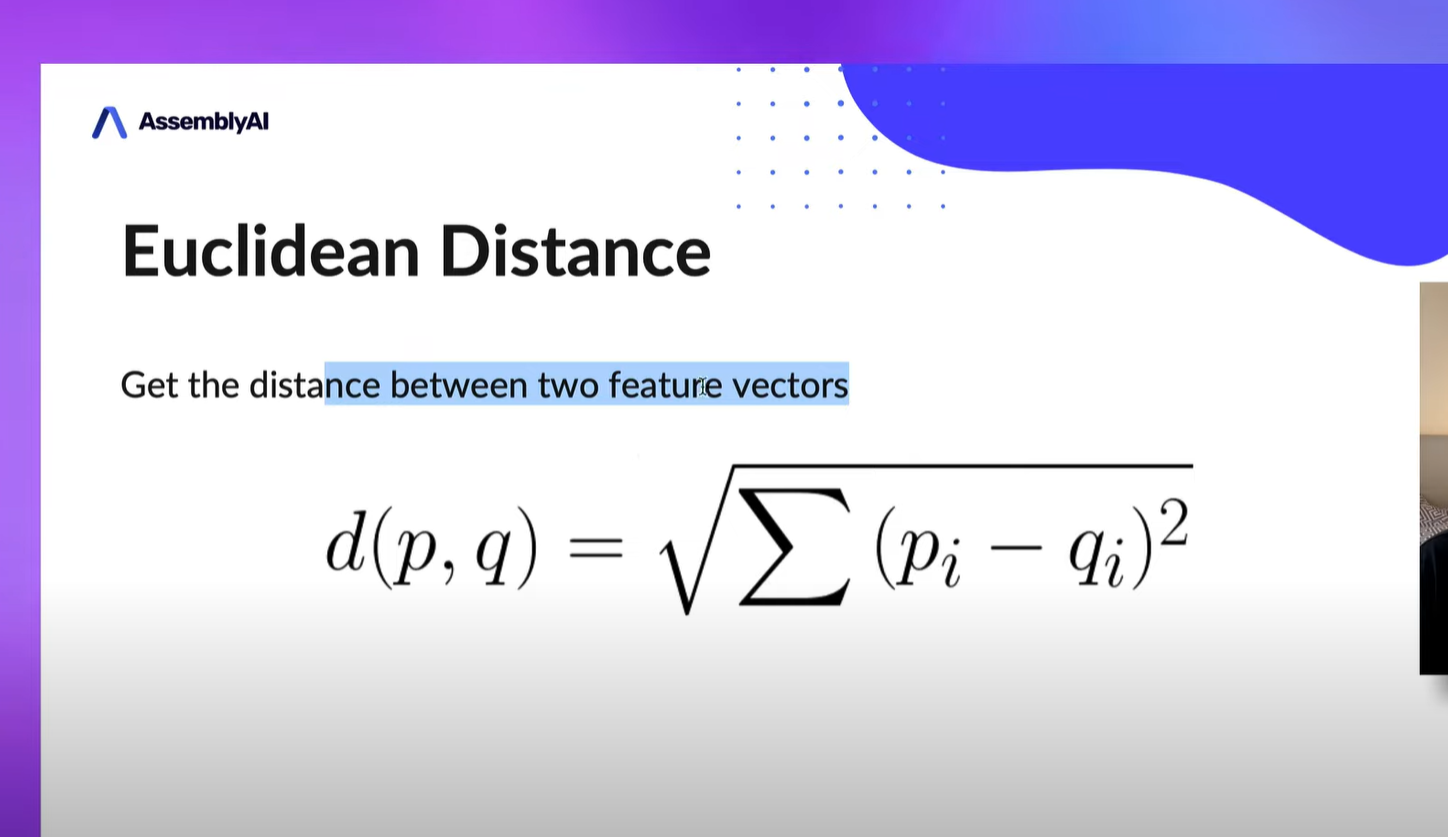

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
class KMeans:
    def __init__(self,k=5,max_iter=1000,plot_steps=False):
        self.k = k
        self.max_iter=max_iter
        self.plot_steps = plot_steps
        
        #list of empty clusters
        self.clusters = [[] for _ in range(self.k)]
        
        #centroids of each clusters
        self.centroids = []
        
    def predict(self,X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        #initialize the centroids. we select 5 random centroids
        random_sample_idxs = np.random.choice(self.n_samples,self.k,replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        
        #Optimize clusters
        for _ in range(self.max_iter):
            #assign the samples to the closest centroid.
            self.clusters = self._create_clusters(self.centroids)
            
            if self.plot_steps:
                self.plot()
            
            #calculate the new centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            #checking if our clusters didnt change
            if self._is_converged(centroids_old,self.centroids):
                break
            
        #returning cluster labels.
        #Classify samples as the index of their clusters.
        return self._get_cluster_labels(self.clusters)
    
    def _get_cluster_labels(self,clusters):
        #each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        
        return labels
    
    def _create_clusters(self,centroids):
        #assign samples to the closest centroid
        clusters = [[] for _ in range(self.k)]
        
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample,centroids)
            clusters[centroid_idx].append(idx)
            
        return clusters
    
    def _closest_centroid(self,sample,centroids):
        #distance of the current sample to each centroid
        distances = [self._euclidean_distance(sample,point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def _euclidean_distance(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))
    
    def _get_centroids(self,clusters):
        #assign the mean value of the clusters 
        centroids = np.zeros((self.k,self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster],axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    def _is_converged(self,centroids_old,centroids_new):
        #distances btw old and new centroids, for all centroids
        distances = [self._euclidean_distance(centroids_old[i],centroids_new[i]) for i in range(self.k)]
        return sum(distances) == 0
        
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

        

(500, 2)
3


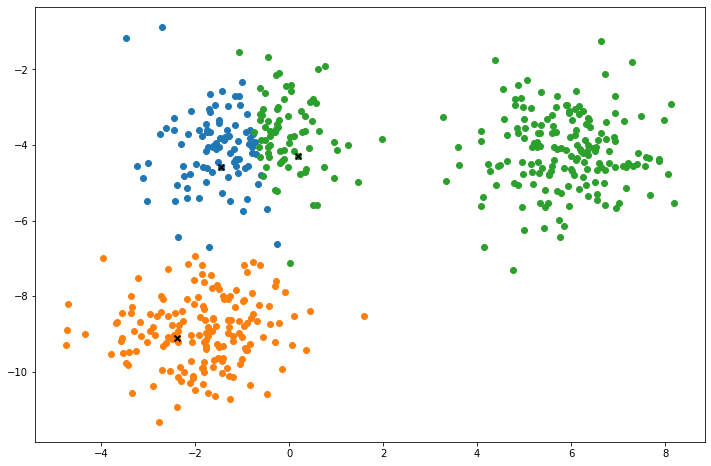

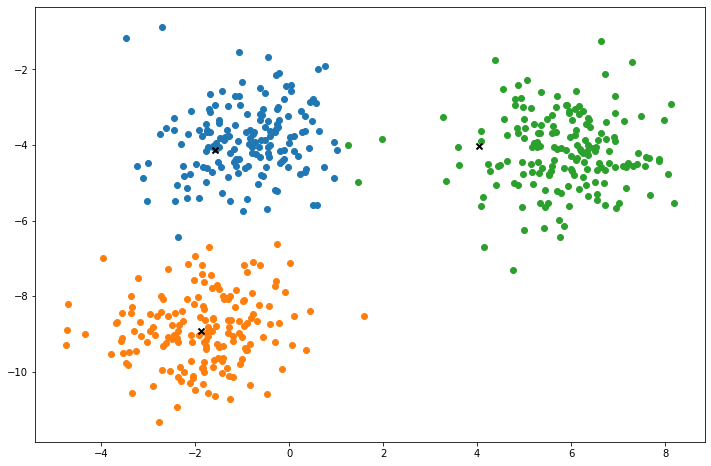

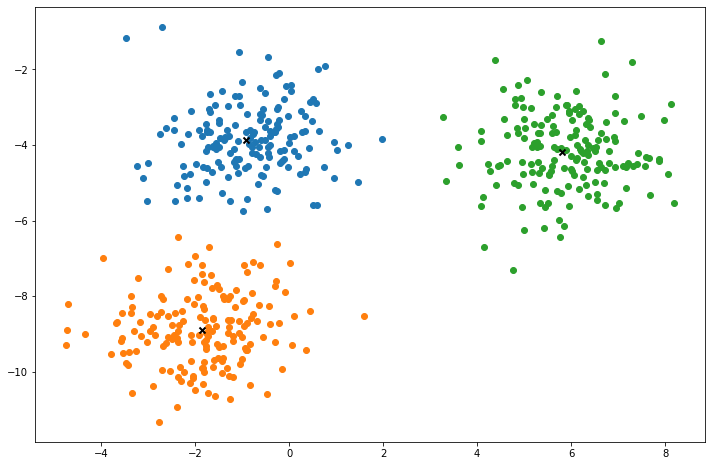

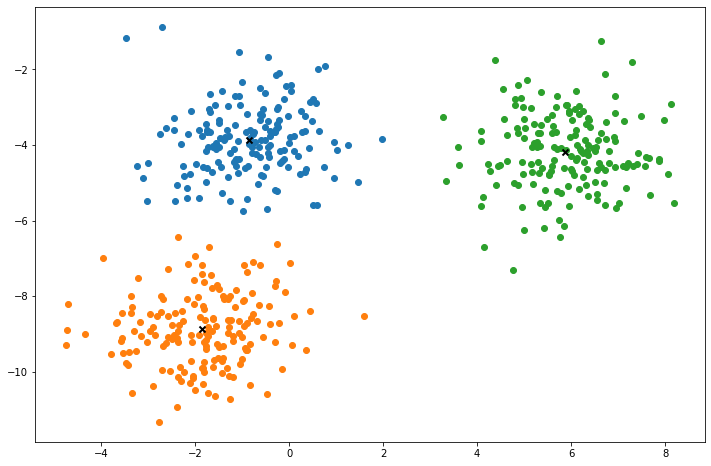

In [13]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)

k = KMeans(clusters,150, plot_steps=True)
y_pred = k.predict(X)

# k.plot()